In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
## Titanic data set

In [4]:
train=pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.sample(n=500)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7000,C118,C


# EDA

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [11]:
train.shape

(891, 12)

In [13]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

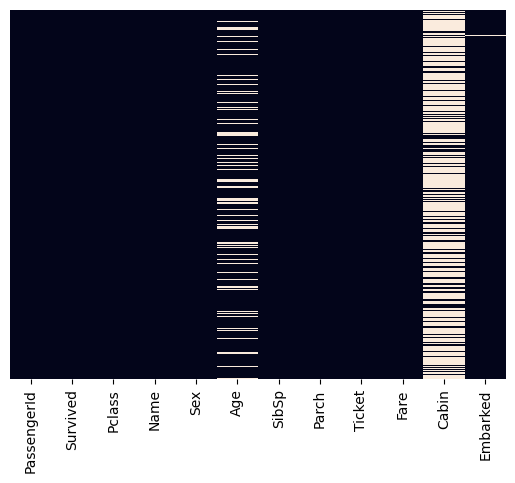

In [14]:
sns.heatmap(train.isna(),yticklabels=False,cbar=False)

In [15]:
prec=train.isna().sum()*100/len(train)
prec

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [16]:
missingdf=pd.DataFrame({"column_name":train.columns,"Missing Perc %":prec})
missingdf.sort_values(by="Missing Perc %",ascending=False)

,column_name,Missing Perc %
Cabin,Cabin,77.104377
Age,Age,19.865320
Embarked,Embarked,0.224467
PassengerId,PassengerId,0.000000
Name,Name,0.000000
Pclass,Pclass,0.000000
Survived,Survived,0.000000
Sex,Sex,0.000000
Parch,Parch,0.000000
SibSp,SibSp,0.000000


<Axes: xlabel='Survived', ylabel='count'>

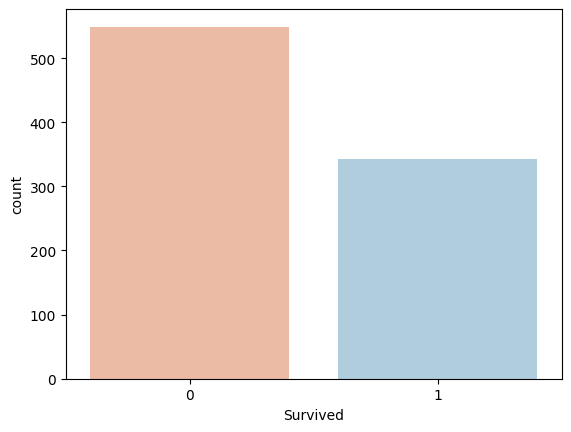

In [17]:
sns.countplot(x="Survived",data=train,palette="RdBu")

<Axes: xlabel='Survived', ylabel='count'>

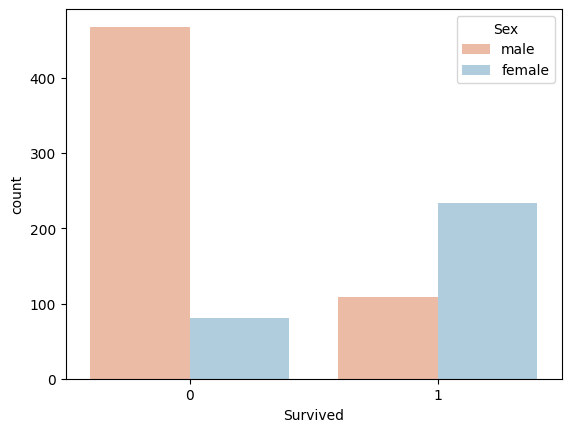

In [18]:
sns.countplot(x="Survived",hue="Sex",data=train,palette="RdBu")

<Axes: xlabel='Survived', ylabel='count'>

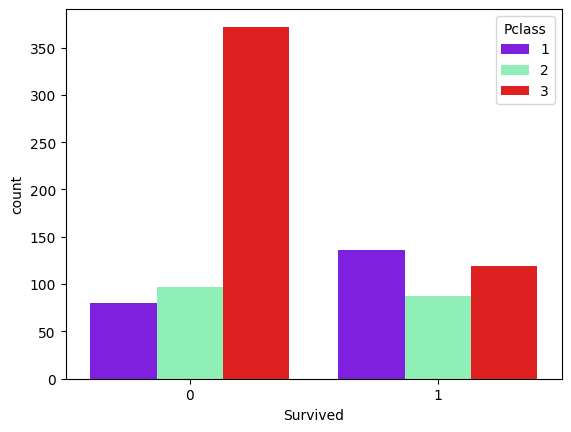

In [19]:
sns.countplot(x="Survived",hue="Pclass",data=train,palette='rainbow')

<Axes: xlabel='Age', ylabel='Density'>

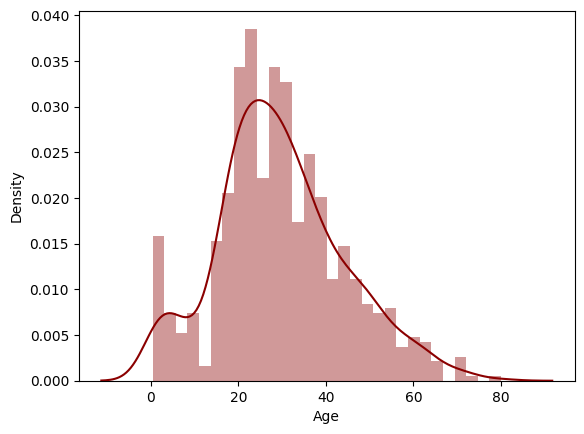

In [22]:
sns.distplot(train.Age.dropna(),kde=True, color="darkred",bins=30)

<Axes: >

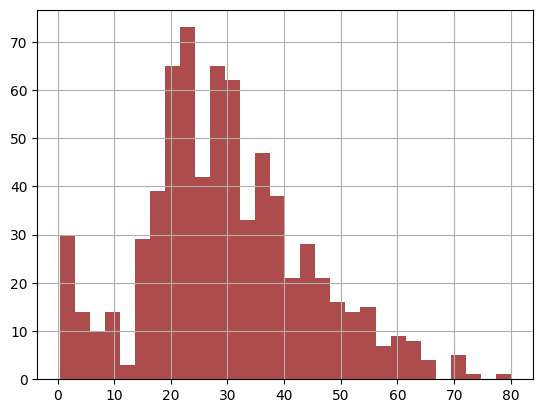

In [23]:
train.Age.hist(bins=30,color='darkred',alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

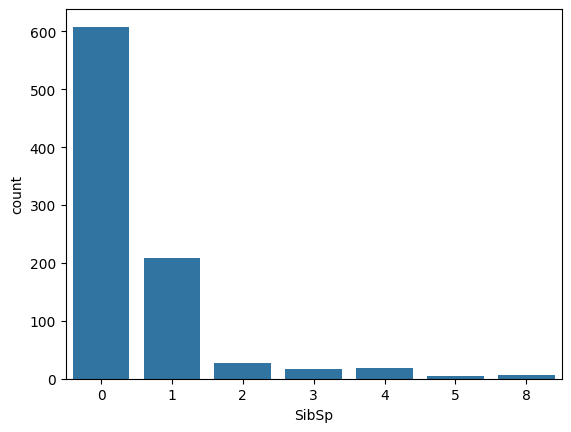

In [24]:
sns.countplot(x="SibSp",data=train)

<Axes: xlabel='Fare', ylabel='Count'>

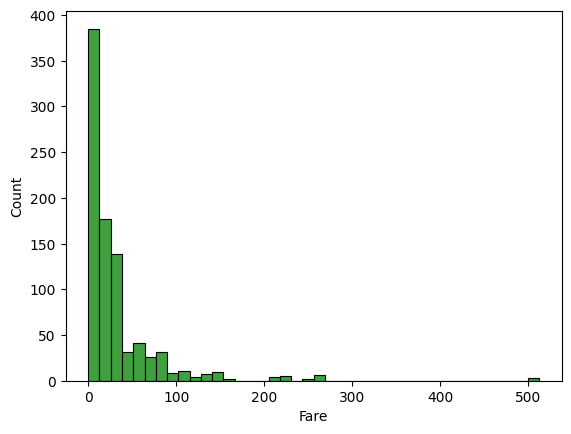

In [25]:
sns.histplot(x=train.Fare,bins=40,color="green")


# Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

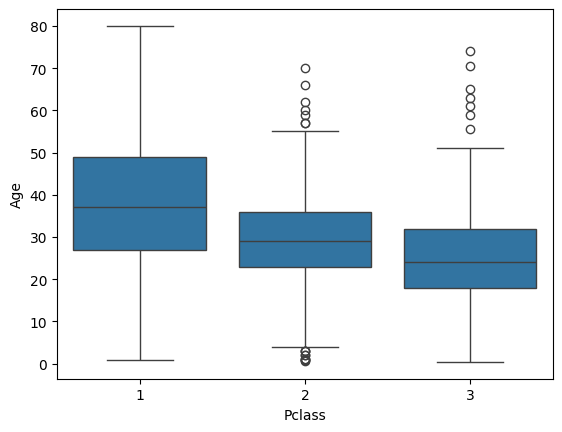

In [26]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [27]:
def impute_age(val):
    Age=val[0]
    Pclass=val[0]
    if pd.isna(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 23
    else:
        return Age

In [28]:
train.Age=train[["Age","Pclass"]].apply(impute_age,axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

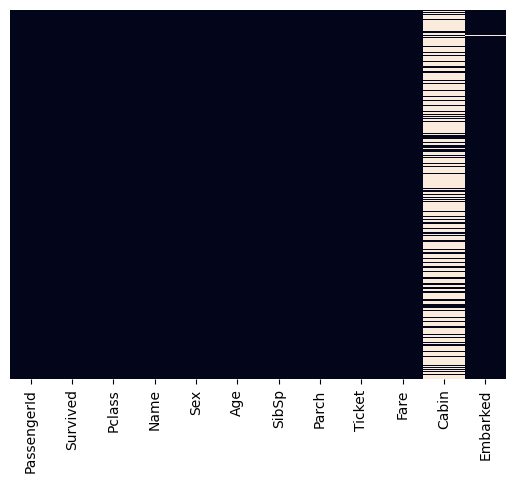

In [29]:
sns.heatmap(train.isna(),yticklabels=False,cbar=False)

In [30]:
train.drop('Cabin',axis=1,inplace=True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [33]:
sex=pd.get_dummies(train.Sex,drop_first=True,dtype=int)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [34]:
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [35]:
embarked=pd.get_dummies(train.Embarked,drop_first=True,dtype=int)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [37]:
train.drop(['PassengerId','Sex','Name','Embarked','Ticket'],axis=1,inplace=True)

In [38]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [39]:
train=pd.concat([train,sex,embarked],axis=1)

In [40]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [38]:
# train_sur=train.Survived

In [39]:
# from sklearn.preprocessing import StandardScaler

In [40]:
# Ss=StandardScaler()

In [41]:
# trained=Ss.fit_transform(train.drop("Survived",axis=1))


In [42]:
# trainedval=pd.DataFrame(trained,columns=train.drop("Survived",axis=1).columns)
# train=trainedval

In [43]:
# train.head()

In [44]:
# train=pd.concat([train,train_sur],axis=1)

In [41]:
train.shape

(891, 9)

# Building a Linear Regression Model

## Train-Test-Split

In [42]:
from sklearn.model_selection import train_test_split as tts

In [43]:
X_train,x_test,Y_train,y_test=tts(train.drop("Survived",axis=1),train.Survived,test_size=0.30)

In [44]:
X_train.shape

(623, 8)

In [45]:
x_test.shape

(268, 8)

In [46]:
Y_train.shape

(623,)

In [47]:
y_test.shape

(268,)

## Model Building

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
mod=LogisticRegression()

In [50]:
mod.fit(X_train,Y_train)

LogisticRegression()

In [51]:
pred=mod.predict(x_test)

In [56]:
pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

In [53]:
pred_prob=mod.predict_proba(x_test)
pred_prob

array([[0.86836707, 0.13163293],
       [0.05212434, 0.94787566],
       [0.88689338, 0.11310662],
       [0.727978  , 0.272022  ],
       [0.727978  , 0.272022  ],
       [0.88818701, 0.11181299],
       [0.06752375, 0.93247625],
       [0.74504267, 0.25495733],
       [0.71398032, 0.28601968],
       [0.06357505, 0.93642495],
       [0.86844457, 0.13155543],
       [0.76285566, 0.23714434],
       [0.87266537, 0.12733463],
       [0.36523072, 0.63476928],
       [0.41538557, 0.58461443],
       [0.88798371, 0.11201629],
       [0.95509312, 0.04490688],
       [0.91031965, 0.08968035],
       [0.30738238, 0.69261762],
       [0.64081511, 0.35918489],
       [0.89905017, 0.10094983],
       [0.81456609, 0.18543391],
       [0.82728906, 0.17271094],
       [0.22453705, 0.77546295],
       [0.88039445, 0.11960555],
       [0.95784664, 0.04215336],
       [0.94853747, 0.05146253],
       [0.8719162 , 0.1280838 ],
       [0.32978297, 0.67021703],
       [0.50947202, 0.49052798],
       [0.

# Evalutation Metrics

In [54]:
from sklearn.metrics import classification_report as cr, accuracy_score as acc, confusion_matrix as cm

In [55]:
class_report=cr(y_test,pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       158
           1       0.81      0.74      0.77       110

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [56]:
confuse=cm(y_test,pred)
print(confuse)

[[139  19]
 [ 29  81]]


<Axes: >

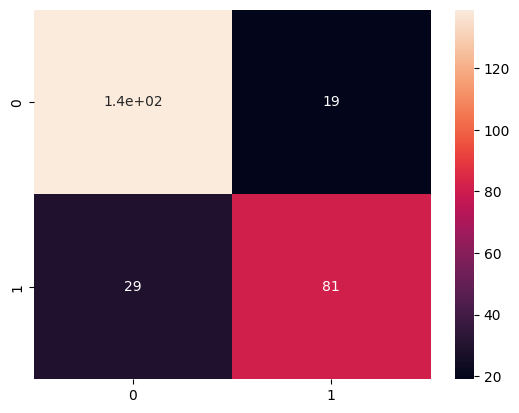

In [57]:
sns.heatmap(confuse,annot=True)

In [58]:
acc_score=acc(y_test,pred)
print(acc_score)

0.8208955223880597


In [60]:
from sklearn.metrics import roc_curve as rc, auc

[inf  1.  0.]


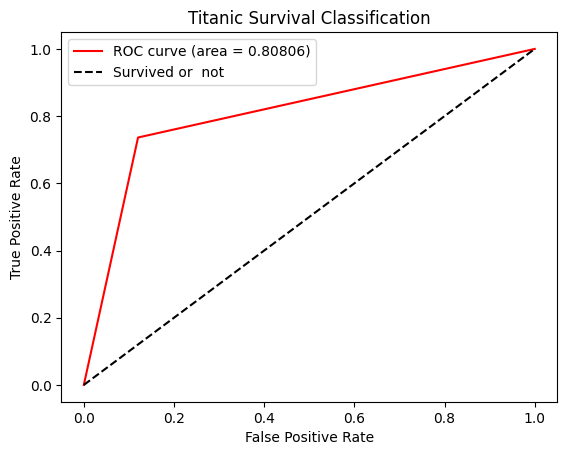

In [68]:
fpr,tpr,threshold=rc(y_test,pred)
print(threshold)
roc_auc=auc(fpr,tpr)
plt.figure()  
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Survived or  not')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic Survival Classification')
plt.legend()
plt.show()

In [69]:
import pickle as pic

In [70]:
pic.dump(mod,open("binomial-logR.sav",mode='wb',))